In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
DF = pd.read_csv(r"C:\Users\Ian's Second PC\Downloads\archive (7)\Employee.csv", encoding = 'utf-8')
DF.head()


Bad key text.latex.preview in file C:\Users\IansSecondPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\IansSecondPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\IansSecondPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality p

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [2]:
def first_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Samples: %d,\nFeatures Count: %d,\nDuplicates: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))


In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
first_EDA(DF)

Samples: 4653,
Features Count: 9,
Duplicates: 1889,
Null Entries: 0,
Number of Rows with Null Entries: 0 0.0%


In [5]:
DF['EduCat'] = DF['Education'].astype('category')
DF['EduCat'].replace(['Bachelors','Masters','PHD'], [0, 1, 2], inplace=True)
DF['GenderDummy'] = DF['Gender'].replace(['Male','Female'], [0, 1])
DF['BenchDummy'] = DF['EverBenched'].replace(['No', 'Yes'], [0, 1])
DF['EXP'] = DF['ExperienceInCurrentDomain']
DF['EXP'] = DF['EXP'].astype(int)
DF['EduCat'] = DF['EduCat'].astype(int)
DF = DF.drop('ExperienceInCurrentDomain', axis = 1)
DF.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,LeaveOrNot,EduCat,GenderDummy,BenchDummy,EXP
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,0,0,0
1,Bachelors,2013,Pune,1,28,Female,No,1,0,1,0,3
2,Bachelors,2014,New Delhi,3,38,Female,No,0,0,1,0,2
3,Masters,2016,Bangalore,3,27,Male,No,1,1,0,0,5
4,Masters,2017,Pune,3,24,Male,Yes,1,1,0,1,2


In [6]:
#This Presentation is meant for an executive audience, specifically for hiring policies and hiring metrics as well as 
#human resources policies. While some qualitative methods such as STAR can help parse the preferred candidates among a 
#field of those equally qualified, this may provide insight on the selection methods for the retention of employees, 
#both in the hiring field, and in the policies around retention. Both segments will be analyzed, and analyzed from a variety
#of angles. The primary focus will be tracking what factors make an employee more likely to leave, for retention purposes.
#In addition, the question of factors such as education level and compensation and their impact on retention.

In [7]:
#First and Foremost, it may be helpful to understand how well represented each of these demographics are in the data.
#To this end, the employees in the list will be evaluated in terms of payment tier, age, and education level, to understand
#the current situation around the company's employee base.

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

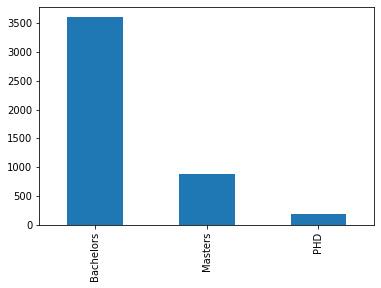

In [8]:
DF['Education'].value_counts().plot(kind='bar')
DF['Education'].value_counts()

In [9]:
#Predictably, the counts of education heavily favor bachelor's degree. out of 4653 employees, 3601 
#have only a bachelor's degree. This is 77.40% of the total sample. Master's Degrees in turn make up 18.76% of the sample.
#Finally, PHDs make the smallest portion, only 3.84%. While the statistic on Bachelor's Degrees being so overwhelmingly large
#can seem overwhelming and intimidating, there may be outsize performance and other metrics associated with the 22.60% of 
#those with advanced degrees.

In [15]:
#Now, let's observe the gender parity within the organization, it should further be noted that the correlations between
#variables such as gender and things like education level may have causes that are not necessarily the result of the 
#company's policies. These may include broader societal trends around education and gender, as well as systemic issues such
#as academic discriminiation.

Male      2778
Female    1875
Name: Gender, dtype: int64

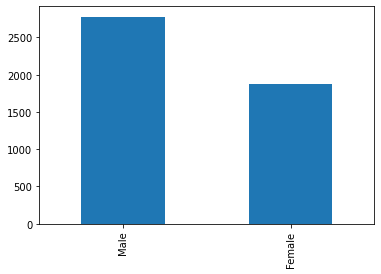

In [16]:
DF['Gender'].value_counts().plot(kind='bar')
DF['Gender'].value_counts()

In [ ]:
#Men in turn make up a substantially larger portion of employees in this company. Out of 4653, 2778 are male, or 59.70%
#Women, as a consequence, make up only 1875, or 39.30%, a roughly ten percent disparity. In India, the gender parity in the 
#general population does favor men, but only a 3% difference, certainly not proportionate to the gender divide across Indian
#society. This is likely due to broad, systemic practices discouraging women from educaiton and the workforce in India.

In [ ]:
#Now, let's examine a more quantitative variable, that of age. While some variation in age and experience is naturally 
#to be expected, the question of the company's position within its industry, based on the age and of its employee base
#is a worthwhile question to investigate. After all, an older, seasoned worker that knows an older industry well may have
#significant value, but for a newer industry, a younger, more innovative base may prove more effective.

26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
34    136
38    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: Age, dtype: int64

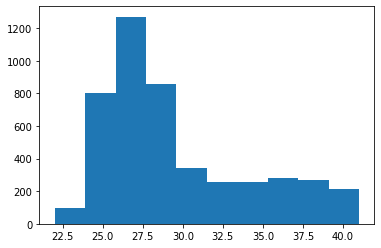

In [20]:
plt.hist(DF['Age'])
DF['Age'].value_counts()

In [ ]:
#As can be observed with another bar chart, this is a very young company, all employees range in age from 22 to 41,
#with the distribution heavily skewed to the younger side of that, the modal age is only 26. In light of this information, 
#may be useful to see if age has a particularly strong impact on income, both to determine if this is the product of there
#being a greater abundance of lower-level positions that attract younger, less experienced employees, or if there is a 
#genuine preference for younger workers outside of this. To illustrate this point, let's examine pay tiers in corrolary to
#age

In [27]:
DF['Age'].corr(DF['PaymentTier'])

0.00763089984971288

<AxesSubplot:xlabel='PaymentTier', ylabel='Age'>

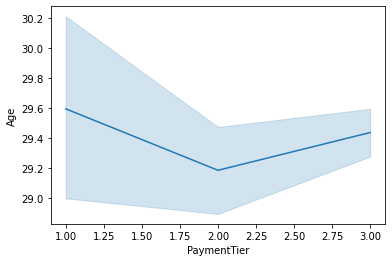

In [29]:
import seaborn as sns
sns.lineplot(x="PaymentTier", y="Age", data=DF)

In [ ]:
#From this analysis, there is a striking finding: There is little correlation at all between age and compensation. While 
#there is a small positive correlation, it is of less than 1%. It may be helpful to examine other varaibles to determine the
#proper factor to be examining.

In [31]:
DF['GenderDummy'].corr(DF['PaymentTier'])

-0.23511855979199947

<AxesSubplot:xlabel='PaymentTier', ylabel='GenderDummy'>

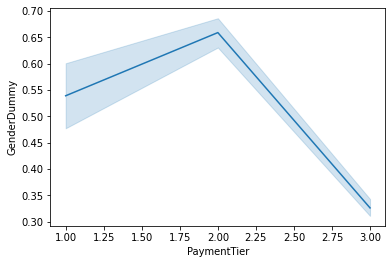

In [32]:
sns.lineplot(x="PaymentTier", y="GenderDummy", data=DF)

In [33]:
DF['EduCat'].corr(DF['PaymentTier'])

-0.14074103672484095

In [40]:
DF['EduCat'].corr(DF['GenderDummy'])

0.010888811077062991

<AxesSubplot:xlabel='EduCat', ylabel='GenderDummy'>

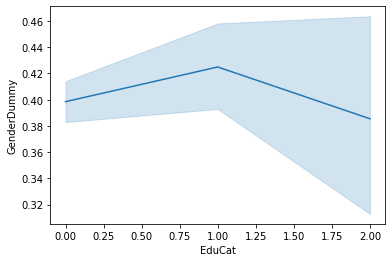

In [41]:
sns.lineplot(x="EduCat", y="GenderDummy", data=DF)

<AxesSubplot:xlabel='PaymentTier', ylabel='EduCat'>

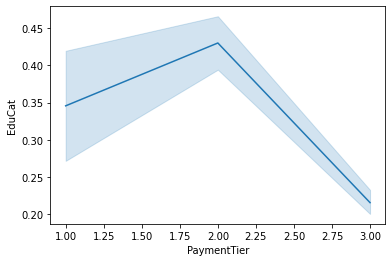

In [35]:
sns.lineplot(x="PaymentTier", y="EduCat", data=DF)

In [37]:
DF['GenderDummy'].corr(DF['BenchDummy'])

-0.01965290642578337

<AxesSubplot:xlabel='GenderDummy', ylabel='BenchDummy'>

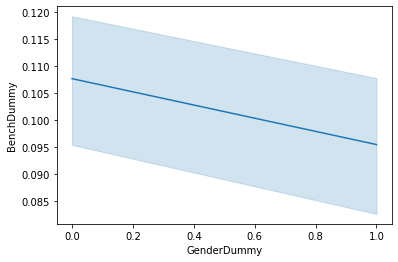

In [38]:
sns.lineplot(x="GenderDummy", y="BenchDummy", data=DF)

In [39]:
DF['EXP'].corr(DF['PaymentTier'])

0.018314321387224046

<AxesSubplot:xlabel='EXP', ylabel='PaymentTier'>

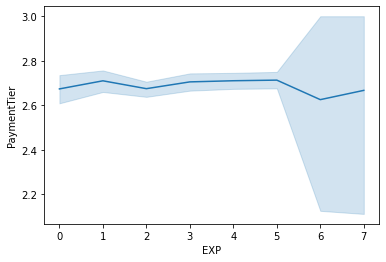

In [43]:
sns.lineplot(x="EXP", y="PaymentTier", data=DF)

In [55]:
DF.corr()

,JoiningYear,PaymentTier,Age,LeaveOrNot,EduCat,GenderDummy,BenchDummy,EXP
JoiningYear,1.000000,-0.096078,0.013165,0.181705,0.142670,0.012213,0.049353,-0.036525
PaymentTier,-0.096078,1.000000,0.007631,-0.197638,-0.140741,-0.235119,0.019207,0.018314
Age,0.013165,0.007631,1.000000,-0.051126,-0.010611,0.003866,-0.016135,-0.134643
LeaveOrNot,0.181705,-0.197638,-0.051126,1.000000,0.080497,0.220701,0.078438,-0.030504
EduCat,0.142670,-0.140741,-0.010611,0.080497,1.000000,0.010889,-0.052249,-0.004463
GenderDummy,0.012213,-0.235119,0.003866,0.220701,0.010889,1.000000,-0.019653,-0.008745
BenchDummy,0.049353,0.019207,-0.016135,0.078438,-0.052249,-0.019653,1.000000,0.001408
EXP,-0.036525,0.018314,-0.134643,-0.030504,-0.004463,-0.008745,0.001408,1.000000


In [ ]:
#These correlations showcase a wide variety of trends to be found in the data. While some, those involving compensation and
#education based on gender have been mentioned before, and may be a result of systemic discrimination reducing the pool of
#women qualified for better-paying jobs, the other findings read a bit less intuitive. First of all, there is the, albeit
#weak, negative correlation between education past master's degree (PHD), and compensation, and perhaps the strangest, the 
#finding that women were slightly less likely than men to require benching. Despite being underrepresented and underpaid, it
#seems that women are slighlty more competent workers within the company. It should also be noted that while men are more
#likely to hold PHDs, women are more likely to hold master's degrees, despite a broad tendency to be paid less (although
#this is correlated fairly closely with payment tier as well, women are slightly favored at both master's degrees and
#payment tier 2). Perhaps most oddly, bachelor's degrees are favored at payment tier 3, likely due to some high-level
#outliers. When it comes to experience, the variation is extremely broad towards the top, supporting this idea. 

In [ ]:
#While these correlations are interesting in and of themselves, the primary purpose here is to examine employee retention 
#rates. While the details above may provide context and help explain the effects found in the LeaveOrNot category.
#While this is not an exact variable tracking employee departure, however it does consider the temporary departures
#which will naturally cut into the company's potential for growth and initial productivity.

In [46]:
DF['LeaveOrNot'].corr(DF['PaymentTier'])

-0.19763776738141295

<AxesSubplot:xlabel='LeaveOrNot', ylabel='PaymentTier'>

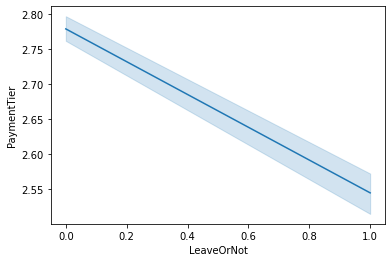

In [47]:
sns.lineplot(x="LeaveOrNot", y="PaymentTier", data=DF)

In [48]:
DF['LeaveOrNot'].corr(DF['GenderDummy'])

0.22070050851604348

<AxesSubplot:xlabel='LeaveOrNot', ylabel='GenderDummy'>

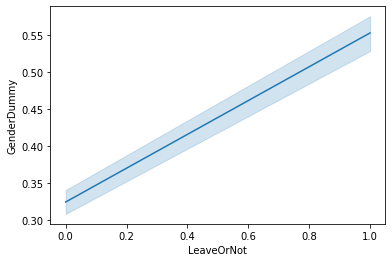

In [50]:
sns.lineplot(x="LeaveOrNot", y="GenderDummy", data=DF)

In [51]:
DF['LeaveOrNot'].corr(DF['EXP'])

-0.030504123536844768

<AxesSubplot:xlabel='LeaveOrNot', ylabel='EXP'>

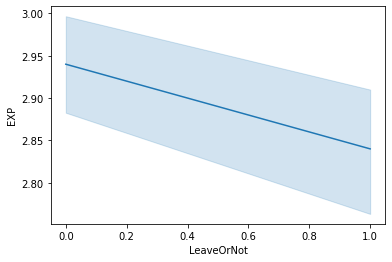

In [52]:
sns.lineplot(x="LeaveOrNot", y="EXP", data=DF)

In [ ]:
#When it comes to the issues of pay, gender, and experience, the first and third are negative, meaning that those with 
#more experience and higher pay, the worker is less likely to take a leave of absence, while women are more likely to take
#the leave. The reason for this final point should also be fairly intuitive, simply that maternity leave, both as a result 
#of the need to recover from pregnancy, bond with their children, and also the social pressure to stay as the 'primary' 
#parent over the father. 

In [ ]:
#On the point of leave, the situation can limit the opportunity for both the worker and the company, as the company is
#placed in the position of either losing a worker and the relevant department suffering, or having to hire a temporary,
#less-experienced worker, further hampering department productivity. The specter of gender is also relevant here, as 
#there is substantial evidence that having more women in leadership confers significant benefits around profitability,
#retention, and company culture, implying that both attracting more women to the company and minimizing leave will benefit
#the company. To this end, the following policy suggestions are recommended.

In [ ]:
#1. Implement a tie-breaker policy for internal advancement, offering promotions to equally qualified women.
#2. Determine factors that make women who have stayed with the company for longer stay, by determining what they value
#in the workplace, and promote those elements, provided they do not directly conflict with the same responses of ther male 
#counterparts.
#3. While maternity leave is difficult to minimize, determine any other forms of leave, and attempt to minimize it in any 
#way possible, based on further survey data.

In [ ]:
#Thank you for attending this presentation. I hope it proves informative and helpful in determining better hiring
#and retention policies.